In [2]:
%pylab notebook
import time, os, pickle
try:
    # -- global installation
    from oiutils import dpfit, oifits, oimodels
except:
    # -- local installation
    import sys
    sys.path = ['../oiutils'] + sys.path
    import dpfit, oifits, oimodels

Populating the interactive namespace from numpy and matplotlib


In [103]:
# -- data from OIDB:
# http://oidb.jmmc.fr/search.html?conesearch=alpha%20cen%20%2CJ2000%2C2%2Carcmin&instrument=PIONIER&order=%5Etarget_name
directory = './AlphaCenA/'
files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.fits')]
data = oifits.loadOI(files)
# -- create some chaos in the data!
tmp = data[0].pop('OI_VIS2')

loadOI: loading ./AlphaCenA/PIONI.2016-05-31T04_39_53.560_oidataCalibrated.fits insname: "PIONIER_Pnat(1.5180295/1.7625230)" targname: "Alpha_Cen_A"
  > D0-G2-J3-K0 | WL: (6,) 1.518 to 1.763 um | ['OI_T3', 'OI_VIS2'] | TELLURICS: False
loadOI: loading ./AlphaCenA/20160523_AlphaCenA_1.fits insname: "PIONIER_Pnat(1.5173540/1.7607517)" targname: "Alpha_Cen_A"
  > B2-C1-D0 | WL: (6,) 1.517 to 1.761 um | ['OI_T3', 'OI_VIS2'] | TELLURICS: False
loadOI: loading ./AlphaCenA/20160530_AlphaCenA.fits insname: "PIONIER_Pnat(1.5191559/1.7625158)" targname: "Alpha_Cen_A"
  > D0-G2-J3-K0 | WL: (6,) 1.519 to 1.763 um | ['OI_T3', 'OI_VIS2'] | TELLURICS: False
loadOI: loading ./AlphaCenA/20160523_AlphaCenA_2.fits insname: "PIONIER_Pnat(1.5173540/1.7607517)" targname: "Alpha_Cen_A"
  > A0-B2-D0 | WL: (6,) 1.517 to 1.761 um | ['OI_T3', 'OI_VIS2'] | TELLURICS: False
loadOI: loading ./AlphaCenA/PIONI.2016-05-31T00_55_19.075_oidataCalibrated.fits insname: "PIONIER_Pnat(1.5180295/1.7625230)" targname: "Alpha_

In [106]:
from importlib import reload
reload(oifits)
merged = oifits.mergeOI(data, debug=False)

0 PIONIER_Pnat(1.5180295/1.7625230)[1.5180296 1.5690527 1.6195483 1.6701432 1.7206359 1.7625229]
1 PIONIER_Pnat(1.5173540/1.7607517)[1.517354  1.5665228 1.6168808 1.6684656 1.7190392 1.7607517]
2 PIONIER_Pnat(1.5191559/1.7625158)[1.519156  1.5688138 1.6196338 1.67076   1.7205938 1.7625158]
3 PIONIER_Pnat(1.5173540/1.7607517)[1.517354  1.5665228 1.6168808 1.6684656 1.7190392 1.7607517]
4 PIONIER_Pnat(1.5180295/1.7625230)[1.5180296 1.5690527 1.6195483 1.6701432 1.7206359 1.7625229]
5 PIONIER_Pnat(1.5180295/1.7625230)[1.5180296 1.5690527 1.6195483 1.6701432 1.7206359 1.7625229]
6 PIONIER_Pnat(1.5191559/1.7625158)[1.519156  1.5688138 1.6196338 1.67076   1.7205938 1.7625158]
7 PIONIER_Pnat(1.5173540/1.7607517)[1.517354  1.5665228 1.6168808 1.6684656 1.7190392 1.7607517]
8 PIONIER_Pnat(1.5190903/1.7636960)[1.5190903 1.5689543 1.6201218 1.6716518 1.7213029 1.763696 ]


In [113]:
for m in data:
    for k in m['OI_T3']:
        print(m['OI_T3'][k]['u1'])

[-85.41679535 -74.26250015 -91.68620031 -74.26250015 -91.68620031
 -74.26250015 -91.68620031]
[-59.09281822 -60.82623246 -67.42058583 -60.82623246 -67.42058583
 -60.82623246 -67.42058583]
[-26.32397713 -13.43626768 -24.26561448 -13.43626768 -24.26561448
 -13.43626768 -24.26561448]
[-59.09281822 -60.82623246 -67.42058583 -60.82623246 -67.42058583
 -60.82623246 -67.42058583]
[8.48278905 9.01184743]
[11.3220615   3.61951991 10.96646563  7.01196811  3.20516422 11.3220615
  3.61951991 10.96646563  7.01196811  3.20516422 11.3220615   3.61951991
 10.96646563  7.01196811  3.20516422 11.3220615   3.61951991 10.96646563
  7.01196811  3.20516422]
[82.95598219 82.95598219 82.95598219 82.95598219]
[82.95598219 82.95598219 82.95598219 82.95598219]
[127.60508907 127.60508907 127.60508907 127.60508907]
[44.64910687 44.64910687 44.64910687 44.64910687]
[-74.34256147 -91.68620031 -85.41679535]
[-60.87248312 -67.42058583 -59.09281822]
[-13.47007835 -24.26561448 -26.32397713 -25.49011868 -25.49011868
 -25

<IPython.core.display.Javascript object>


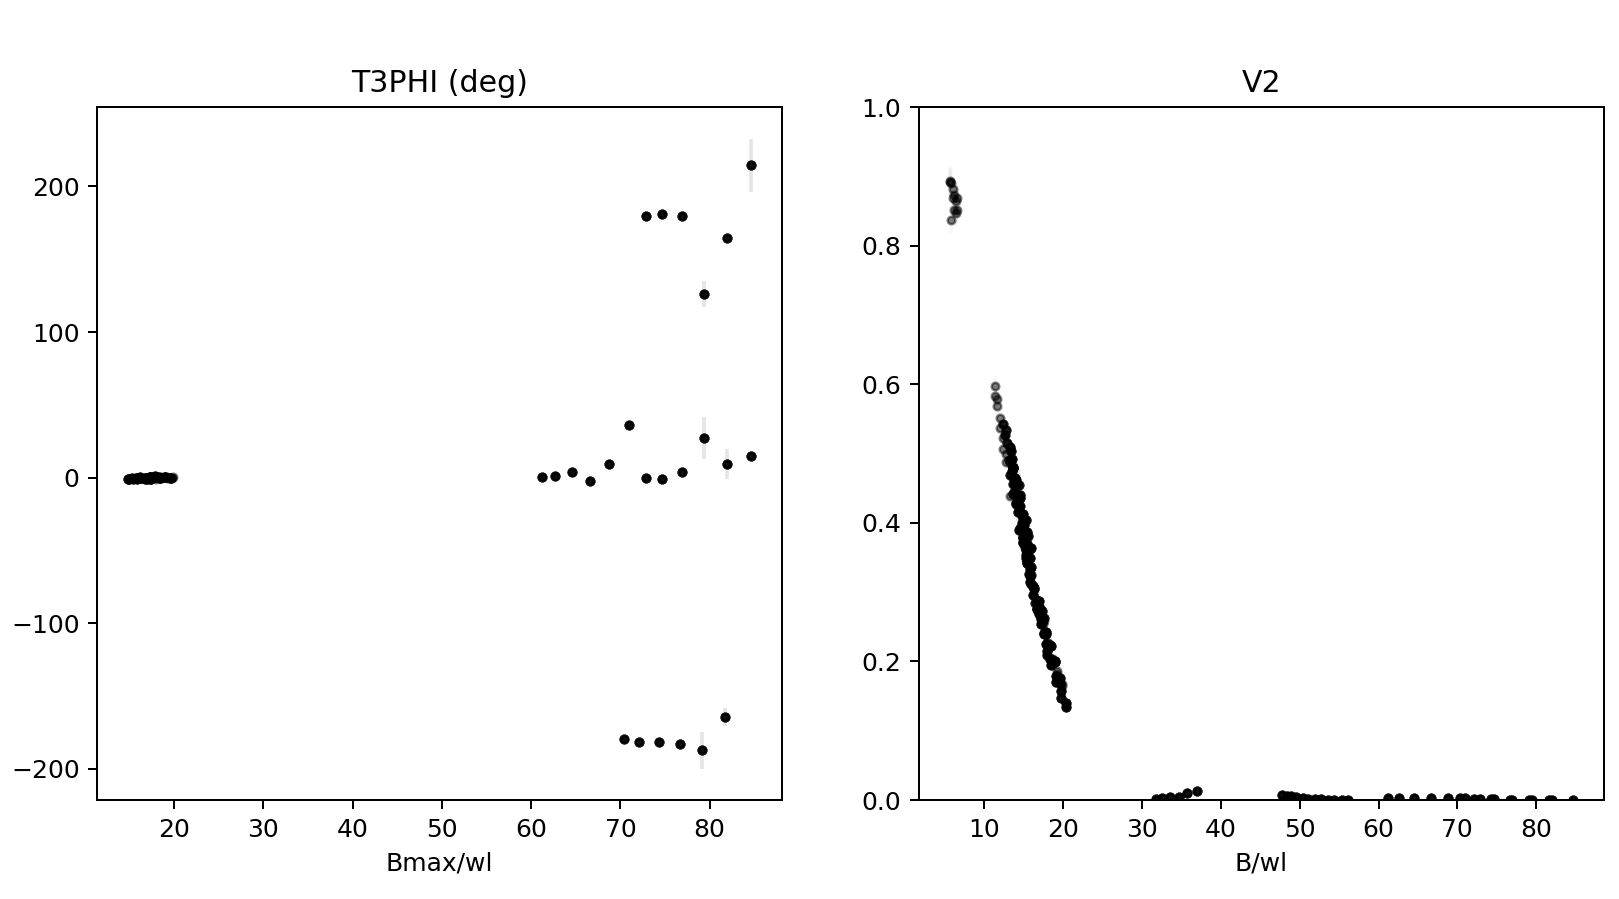

In [107]:
reload(oimodels)
oimodels.showOI(merged[1], allInOne=1)